<a href="https://colab.research.google.com/github/SandeepJosyula/NeuralNetworks/blob/master/SJ_NeuralNetworks_Project_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks Project**
## The Problem 

**Description:** Recognizing multi-digit numbers in photographs captured at street level is an importantcomponent of modern-day map making. A classic example of a corpus of such streetlevel photographs is Google’s StreetView imagery comprised of hundreds of millions ofgeo-located 360 degree panoramic images. The ability to automatically transcribe anaddress number from a geo-located patch of pixels and associate the transcribednumber with a known street address helps pinpoint, with a high degree of accuracy, thelocation of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the opticalcharacter recognition community. While OCR on constrained domains like documentprocessing is well studied, arbitrary multi-character text recognition in photographs isstill highly challenging. This difficulty arises due to the wide variability in the visualappearance of text in the wild on account of a large range of fonts, colours, styles,orientations, and character arrangements. The recognition problem is furthercomplicated by environmental factors such as lighting, shadows, secularities, andocclusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of theimages do contain some distractors at the sides). Although we are taking a sample ofthe data which is simpler, it is more complex than MNIST because of the distractors.

**Data Description:** 
The Street View House Numbers (SVHN) DatasetSVHN is a real-world image dataset for developing machine learning and objectrecognition algorithms with minimal requirement on data formatting but comes from asignificantly harder, unsolved, real world problem (recognizing digits and numbers innatural scene images). SVHN is obtained from house numbers in Google Street Viewimages.

**Link to the dataset:** https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

Acknowledgement for the datasets.Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. NgReading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshopon Deep Learning and Unsupervised Feature Learning 2011. PDFhttp://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

##Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 

**Steps and tasks**

1.Load Dataset

2.Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

3.Data fetching and understand the train/val/test splits. (15points)

4.Implement and apply a deep neural network classifier including (feedforward neuralnetwork, RELU, activations) (25points) 

5.Implement batch normalization for training the neural network(10points) 

6.Print the classification accuracy metrics (10points) 


# **Implementation**

## 1. Import Libraries


In [ ]:
import h5py
import numpy as np
import pandas as pd
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import regularizers,optimizers
from keras.layers import Flatten
from keras.layers import BatchNormalization, Dropout

# Initialize the random number generator
import random
random.seed(0)
import math
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

Using TensorFlow backend.


## 2. Read data and extract required datasets


In [ ]:
# Open the file as read only
h5f = h5py.File( '/content/drive/My Drive/Study/ML & AI - Study/Colab Notebooks/Neural Networks/SVHN_single_grey1.h5', mode='r')
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)
print('X_val shape: ',X_val.shape)
print('y_val shape: ',y_val.shape)
h5f.close()

X_train shape:  (42000, 32, 32)
X_test shape:  (18000, 32, 32)
y_train shape:  (42000,)
y_test shape:  (18000,)
X_val shape:  (60000, 32, 32)
y_val shape:  (60000,)


## 3. Data Pre-processing

### 3.1. Flatten the images for Keras	

In [ ]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape( (X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

print(X_train.shape, X_test.shape, X_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024)


### 3.2. Normalize the inputs for X_train, X_test and X_val	

In [ ]:
print(X_train.max())
print(X_train.min())

254.9745
0.0


In [ ]:
X_train = X_train / 254.9745
X_val = X_val / 254.9745

print(X_train.max())
print(X_train.min())

1.0
0.0


### 3.3. Visualize the first 10 images in X_train and the corresponding Y_train labels	

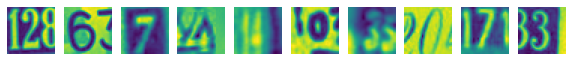

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32))  # For gray scale, use the argument cmap="gray"
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### 3.4. Convert the class matrices y_train, y_test and y_val into one hot vectors	

In [ ]:
# converting y data into categorical (one-hot encoding)
print(y_train[10]) # Check the value before one-hot encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train.shape, y_test.shape, y_val.shape)

print(y_train[10]) # Check the value after one-hot encoding

1
(42000, 10) (18000, 10) (60000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### 3.5. Print the train, test and val shapes	

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## 4. Model Building - Definition

 - In the train and test loop, define the hyperparameters for the model	
 - Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions	
 - Define the optimizer to be used
 - Compile the model with the corresonding loss & metrics to monitor
 - Fit the model and use model.evaluate() to return the score

In [ ]:
def train_and_test_loop(X, y, hidden_nodes, output_nodes, iter_epochs, btc_size, lr, Lambda, verb=True, addbatchnormalization=False, setdropout=False):

    ## hyperparameters
    eps = iter_epochs
    learning_rate = lr
    hidden_nodes = hidden_nodes 
    output_nodes = output_nodes 
    btc_size = btc_size 
    dropout_val = 0.2
    # pick a sequential model    
    model = Sequential()

    # define the input size to 1024 - which is 32*32 size of the image
    if addbatchnormalization ==True:
      print('Added Batch Normalization after input layer') 
      model.add(Dense(hidden_nodes, input_shape=(1024,)))    #use activation function RELU for input layer
      model.add(BatchNormalization())      
      model.add(Activation('relu'))  
      if setdropout ==True:
        model.add(Dropout(dropout_val)) 
      model.add(Dense(hidden_nodes))    
      model.add(BatchNormalization())      
      model.add(Activation('relu'))  
      if setdropout ==True:
        model.add(Dropout(dropout_val))
      model.add(Dense(hidden_nodes))    
      model.add(BatchNormalization())      
      model.add(Activation('relu'))  
      if setdropout ==True:
        model.add(Dropout(dropout_val))
      model.add(Dense(hidden_nodes))    
      model.add(BatchNormalization())      
      model.add(Activation('relu'))  
      if setdropout ==True:
        model.add(Dropout(dropout_val))
      model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    else:
      model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))    #use activation function RELU for input layer
      model.add(Dense(hidden_nodes, activation='relu'))
      model.add(Dense(hidden_nodes, activation='relu'))
      model.add(Dense(hidden_nodes, activation='relu'))
      model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    # Define the optimizer - SGD 
    print('Optimizer SGD is used')
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model with appropriate loss and metrics
    print('Compiling the model')
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # print model summary
    print(model.summary())

    # Fit the model
    print('Fit the model')
    model.fit(X, y, epochs=eps, batch_size=btc_size, verbose= 1)  
  
    return model
    
    # return the score
    #print('Score:')
    #score = model.evaluate(X, y, verbose=0)
    #return score
    


**Disable Regularization by setting appropriate value for Lambda and check the loss of the NN**
 - Disabling regularization means lambda value set to 0
 


In [ ]:
m1 = train_and_test_loop(X_train, y_train, hidden_nodes=128, output_nodes=10, btc_size=100, iter_epochs=10, lr=0.01, Lambda=0)

Optimizer SGD is used
Compiling the model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 182,026
Trainable params: 182,026
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

In [ ]:
score_m1 = m1.evaluate(X_test,y_test,verbose=0)

In [ ]:
print(score_m1)

[81.83378453826904, 0.7534444332122803]


**Observations:**
 - Accuracy is 0.75. Not bad for a basic hyperparameter values

In [ ]:
# vary the parameters and try again
model_m2 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=10, lr=0.01, Lambda=0.001)

Optimizer SGD is used
Compiling the model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

In [ ]:
score_m2 = model_m2.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 47us/step


In [ ]:
print('Accuracy: ', score_m2[1])

Accuracy:  0.7644444704055786


**Observations:**
 - Accuracy is almost the same for the test set as it is for train set

In [ ]:
# vary the parameters and try again
model_m3 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=10, lr=0.00001, Lambda=0)

Optimizer SGD is used
Compiling the model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

In [ ]:
score_m3 = model_m3.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 44us/step


In [ ]:
print('Accuracy: ', score_m3[1])

Accuracy:  0.1059444472193718


**Observations:**
 - considering the epoch count is too small, may be for higher count the accuracy of the mode may be better

**Increase the Regularization parameter (Lambda) and check how the loss is for the NN**

In [ ]:
model_m4 = train_and_test_loop(X_train, y_train, hidden_nodes=50, output_nodes=10, btc_size=1000, iter_epochs=10, lr=0.001, Lambda=1e3)

Optimizer SGD is used
Compiling the model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
Total params: 59,410
Trainable params: 59,410
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [==============================]

In [ ]:
score_m4 = model_m4.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 24us/step


In [ ]:
print('Accuracy: ', score_m4[1])

Accuracy:  0.09549999982118607


**Observations:**
 - Accuracy is not that better, but the loss has quickly reduced within the 10 epochs

## 5. Overfit a small subset of dataset
 - Network overfit with a small subset of the dataset
 - Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%.	

In [ ]:
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

In [ ]:
X_train_subset.shape

(20, 1024)

In [ ]:
model_m5 = train_and_test_loop(X_train_subset, y_train_subset, hidden_nodes=128, output_nodes=10, btc_size=100, iter_epochs=500, lr=0.001, Lambda=0)

Optimizer SGD is used
Compiling the model
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 182,026
Trainable params: 182,026
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/500
20/20 [==============================] - 

In [ ]:
score_subset = model_m5.evaluate(X_train_subset, y_train_subset)

20/20 [==============================] - 0s 965us/step


In [ ]:
print('Accuracy: ', score_subset[1])

Accuracy:  1.0


**Observations:**
 - For a higher epoch count and for the small subset of data, we are able to overfit completely. The accuracy is 1 in the end

## 6. Load the original dataset with all the images and prepare the data for modelling	

In [ ]:
orig_model = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=10, lr=0.01, Lambda=0.01)

Optimizer SGD is used
Compiling the model
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

In [ ]:
score_orig = orig_model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 45us/step


In [ ]:
print('Accuracy: ',score_orig[1])

Accuracy:  0.7334444522857666


**Observation:**
 - consider the initial accuracy on train and test data. Not bad for start with around 0.73 and 0.75

## 7. Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings	

In [ ]:
model_m6 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=10, lr=1e7, Lambda=1e-7)

Optimizer SGD is used
Compiling the model
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

**Observation**
 - Loss is very high and exploding. That infers the learning rate is very high**
 - Now reduce the learning rate

In [ ]:
model_m7 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=10, lr=1e3, Lambda=1e-7)

Optimizer SGD is used
Compiling the model
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

**Observation**
 - Loss is still very high. Reduce the learing rate
 - Lambda is chosen as very small 1e-7

In [ ]:
model_m8 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=10, lr=1e-3, Lambda=1e-7)

Optimizer SGD is used
Compiling the model
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/10
42000/42000 [=============================

**Observations**
 - Now Loss is less, but accuracy is not increasing sufficient on the train data
 - Lets try other tuning options with the hyper parameters

## 8. Perform Hyperparameter Optimization . Record findings	

**Hyperparameter Optimization**

 - *Cross validation Strategy*
   -  Do coarse -> fine cross-validation in stages
   - First stage: only a few epochs to get rough idea of what params work
   - Second stage: longer running time, finer search
   - … (repeat as necessary)

**Tip for detecting explosions in the solver:**
 - *If the cost is ever > 3 * original cost, break out early*


### 8.1. Run a coarse search for 10 times with different lr(Learning rate) and lambda(regularization) values with 100 epochs

In [ ]:
p = 1e-7
for k in range(1,10):
  if k ==1:
    lr = 10*p
  else:
    lr = lr*10
    print(lr)

9.999999999999999e-06
9.999999999999999e-05
0.001
0.01
0.1
1.0
10.0
100.0


In [ ]:
import math
cns = 1e-7
for k in range(1,10):
    if k==1:
      lr = cns*10
      Lambda = cns*10
    else:
      lr = lr*10
      Lambda = Lambda*10
    model_temp = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=5, lr=lr, Lambda=Lambda,verb=False)
    best_acc = model_temp.evaluate(X_train, y_train)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Optimizer SGD is used
Compiling the model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/5
42000/42000 [=============================

**Observations**
 - Learning rate range is 1e-3 to 1. Best at 1e-2
 - Lambda range is 1e-3 to 1. Best at 1e-2
 - epochs used is very less, so we do not know if the accuracy converges for larger value. Less epoch count is used for performance reasons

**Run one more coarse search by keeping either of the parameters constant and vary the others**

In [ ]:
cns = 1e-4
for j in range(1,4):
  if j==1:
    lr = cns*10
  else:
    lr = lr*10
  for k in range(1,4):
      if k==1:
        Lambda = cns*10
      else:
        Lambda = Lambda*10
      model_temp = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=5, lr=lr, Lambda=Lambda,verb=False)
      best_acc = model_temp.evaluate(X_train, y_train)
      print("Try {0}.{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(j, k, best_acc, lr, Lambda))

Optimizer SGD is used
Compiling the model
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_92 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_94 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_95 (Dense)             (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/5
42000/42000 [=============================

**Observations**
 - lr = 0.01 and Lambda = 0.001 yield the best result

Now try a higher epoch count to verify if this hyper parameter combination is the best

In [ ]:
model_hyper1 = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=100, lr=1e-2, Lambda=1e-3,verb=False)

Optimizer SGD is used
Compiling the model
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_137 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_138 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_139 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_140 (Dense)            (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/100
42000/42000 [===========================

In [ ]:
score_hyper1 = model_hyper1.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 45us/step


In [ ]:
print('Accuracy for best hyperparameters: ', score_hyper1)

Accuracy for best hyperparameters:  [184.87181084843147, 0.8145555257797241]


**Observations**
 - Though the train set accuracy was 0.98, the test set accuracy is just 0.81
 - There is a scope for further fine tuning the hyper parameters, as well as stabilizing the model so that the train accuracy is within comparable limits of train accuracy

### 8.2. Run a finer search by using a finer range of the hyperparameter & Record findings	


In [ ]:
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    model_fine = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=100, lr=lr, Lambda=Lambda,verb=False)
    best_acc = model_fine.evaluate(X_train, y_train)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Optimizer SGD is used
Compiling the model
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_142 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_143 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_144 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_145 (Dense)            (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/100
42000/42000 [===========================

**Observations:**
 - Best accuracy was for learning rate of 0.027 and lambda of 0.00066 (from a previous run)
 - "Try 4/100: Best_val_acc: [0.20601711380907467, 0.9445000290870667], lr: 0.034975337276870265, Lambda: 0.001294084269689749"



## 9. Set the best hyperparameters found in the previous step. Check the Network’s accuracy.	

In [ ]:
Final_model = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=1000, iter_epochs=200, lr=0.027, Lambda=0.00066,verb=False)

Optimizer SGD is used
Compiling the model
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_187 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_188 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_189 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_190 (Dense)            (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/200
42000/42000 [===========================

In [ ]:
Final_score = Final_model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 52us/step


In [ ]:
print('Accuracy of the final neural network model on Test set: ', Final_score[1])

Accuracy of the final neural network model on Test set:  0.8180555701255798


**Observations:**
 - Even with very high accuracy of 0.99 on train data, the model performance on test data is 0.81
 - There is room for considering other tuning options to stabilize the model across training and testing

## 10. Add Batch Normalization technique

In [ ]:
Final_model_Normalized = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=200, lr=0.027, Lambda=0.00066,verb=False, addbatchnormalization=True)

Added Batch Normalization after input layer
Optimizer SGD is used
Compiling the model
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 256)               262400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_192 (Dense)            (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________

In [ ]:
Score_normalized = Final_model_Normalized.evaluate(X_train, y_train)

42000/42000 [==============================] - 2s 58us/step


In [ ]:
print('Accuracy with batch normalization: ', Score_normalized[1])

Accuracy with batch normalization:  0.998452365398407


**Observation**
 - Within the first 20 epochs, the training accuracy went up steep. By 50 epochs, the accuracy went up to 0.98. 
 - By 100 epochs, the accuracy is 0.99. yet planned 200 epochs to see if the accuracy of model on test data improves significantly over the iteration without batch normalization
 - Final train accuracy is very good 0.998

In [ ]:
score_normalized_test = Final_model_Normalized.evaluate(X_test, y_test)
print('Accuracy with batch normalization: ', score_normalized_test[1])

18000/18000 [==============================] - 1s 56us/step
Accuracy with batch normalization:  0.4534444510936737


**Observation:**
 - With Batch Normalization, the training quickly converged and a better accuracy is obtained
 - The model performance on test data is poor compared to non-normalized model
 - This could mean, the hyperparameters could have been further tuned to build the model more stable with batch normalization

## 11. Add Dropout

In [ ]:
Final_model_dropout = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=100, lr=0.027, Lambda=0.00066, setdropout=True, verb=False, addbatchnormalization=True)

Added Batch Normalization after input layer
Optimizer SGD is used
Compiling the model
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 256)               262400    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_197 (Dense)            (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________

In [ ]:
Score_dropout = Final_model_dropout.evaluate(X_train, y_train)

42000/42000 [==============================] - 2s 59us/step


In [ ]:
print('Accuracy with batch normalization & dropout: ', Score_dropout[1])

Accuracy with batch normalization & dropout:  0.918666660785675


In [ ]:
score_dropout_test = Final_model_dropout.evaluate(X_test, y_test)
print('Accuracy with batch normalization & dropout on test data: ', score_dropout_test[1])

18000/18000 [==============================] - 1s 60us/step
Accuracy with batch normalization & dropout on test data:  0.7223333120346069


**Observations:**
 - Considering batch normalization + dropout of 0.2 to see the performance of the model
 - within 25 epochs, the accuracy on train data is steep to 0.83, by the end of 100 epochs, the train accuracy was 0.91
 - But train accuracy was just 0.72, which is lesser than without dropout and batch normailzation

Lets try now with just dropout and without batch normalization and see the model performance with test data

In [ ]:
Final_mdl_dropout = train_and_test_loop(X_train, y_train, hidden_nodes=256, output_nodes=10, btc_size=100, iter_epochs=200, lr=0.027, Lambda=0.00066, setdropout=True, verb=False)

Optimizer SGD is used
Compiling the model
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 256)               262400    
_________________________________________________________________
dense_202 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_203 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_204 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_205 (Dense)            (None, 10)                2570      
Total params: 462,346
Trainable params: 462,346
Non-trainable params: 0
_________________________________________________________________
None
Fit the model
Epoch 1/200
42000/42000 [===========================

In [ ]:
score_mdl_dropout = Final_mdl_dropout.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 51us/step


In [ ]:
print('Accuracy without batch normalization & with dropout on test data: ', score_mdl_dropout[1])

Accuracy without batch normalization & with dropout on test data:  0.7911111116409302


**Observations:**
 - Within first 25 epochs, the model without batch normalization and dropout of 0.2 yielded 0.85 accuracy on train data
 - The train accuracy at end of 200 epochs was 0.94. And test accuracy is 0.79 which is almost the same as without dropout and batch normailzation

## 12. Print Confusion Matrix

In [ ]:
# Get predicted values for non-normalized model and its performance on test data
pred_val_cls_nn = Final_model.predict_classes(X_test, batch_size = 200, verbose=0)

# Revert the one-hot encoded y_test to labels
rounded_labels=np.argmax(y_test, axis=1)

# Now output the confusion matrix
cm = confusion_matrix(rounded_labels, pred_val_cls_nn)
cm

array([[1507,   17,   17,   23,   41,   17,   48,   18,   41,   85],
       [  27, 1384,   34,   59,  103,   26,   41,   61,   49,   44],
       [  20,   14, 1475,   53,   38,   18,   10,   60,   42,   73],
       [   8,   14,   39, 1344,   23,  132,   30,   25,   44,   60],
       [  10,   28,   23,   36, 1579,   20,   32,    8,   33,   43],
       [  15,   13,   12,   97,   21, 1416,   84,   16,   48,   46],
       [  30,   12,    9,   32,   39,   67, 1512,   11,   91,   29],
       [  18,   41,   41,   31,   20,   10,    8, 1593,   13,   33],
       [  25,   20,   29,   52,   27,   44,   92,   16, 1428,   79],
       [  34,   12,   20,   54,   35,   58,   20,   20,   64, 1487]])

**Observation**
 - With Batch normailzation, the accuracy of the model on test data seems to be low for the given training parameters used
 - For the given trained model, the non-normalized model is giving better performance. But stability could be off due to overfitting on training data